# Assignment 12 : Data Preprocessing and Feature Engineering in Machine Learning

### Objective :

 To implement the preprocessing and feature engineering to the given dataset, and to prepare the data to further steps( model building).


### About Data Set :

 Given "Adult" dataset, which predicts whether income exceeds $50K/yr based on census data.


## Task 1: Data Exploration and Preprocessing


In [195]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [196]:
# load the dataset
data = pd.read_csv("adult_with_headers.csv")

In [197]:
data.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [198]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [199]:
data.isna().sum().sum()

0

### Data Interpretation :
- Data having 0 null values so no need to handle missing values.
- It has :

  6 - interger valued features

  9 - object ( categorical) features.

- It has total 15 features ( columns ) and 32,561 records ( rows )


### Applying Scaling techniques to numerical features :

we have two types of scaling techniques 

**1.Standard Scaling:**

Standard Scaling uses the z-score to each record and replaces it's  value with it's z-score.

It has the range from -3.4 to +3.4 

this technique is used when there is no categorical data in the dataset.

**2.Min-Max Scaling:**

Min-Max Scaling uses the formula (x-x.min()/x.max()-x.min())

It has the range from 1 to 0

this technique is used when there is a  categorical data in the dataset.


In [200]:
# This dataset has categorical data so lets apply min_max normalization technique.

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [201]:
data.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [202]:
data.education_num.value_counts()

9     10501
10     7291
13     5355
14     1723
11     1382
7      1175
12     1067
6       933
4       646
15      576
5       514
8       433
16      413
3       333
2       168
1        51
Name: education_num, dtype: int64

In [203]:
# hence the education_num feature is a numerical column so convert it into numerical data type.

data["education_num"] = pd.to_numeric(data.education_num,errors="coerce")

In [204]:
data.education_num.info()

<class 'pandas.core.series.Series'>
RangeIndex: 32561 entries, 0 to 32560
Series name: education_num
Non-Null Count  Dtype
--------------  -----
32561 non-null  int64
dtypes: int64(1)
memory usage: 254.5 KB


In [205]:
# Normalizing the numerical features.

scaled_df = scaler.fit_transform(data[["age","fnlwgt","education_num","capital_gain","capital_loss","hours_per_week"]])

In [206]:
scaled_df

array([[0.30136986, 0.0443019 , 0.8       , 0.02174022, 0.        ,
        0.39795918],
       [0.45205479, 0.0482376 , 0.8       , 0.        , 0.        ,
        0.12244898],
       [0.28767123, 0.13811345, 0.53333333, 0.        , 0.        ,
        0.39795918],
       ...,
       [0.56164384, 0.09482688, 0.53333333, 0.        , 0.        ,
        0.39795918],
       [0.06849315, 0.12849934, 0.53333333, 0.        , 0.        ,
        0.19387755],
       [0.47945205, 0.18720338, 0.53333333, 0.1502415 , 0.        ,
        0.39795918]])

In [207]:
scaled_df = pd.DataFrame(scaled_df,columns=["age","fnlwgt","education_num","capital_gain","capital_loss","hours_per_week"])

In [208]:
# replace the data with normalized data
data[["age","fnlwgt","education_num","capital_gain","capital_loss","hours_per_week"]]= scaled_df

In [209]:
data[["age","fnlwgt","education_num","capital_gain","capital_loss","hours_per_week"]].describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,0.295639,0.120545,0.605379,0.010777,0.020042,0.402423
std,0.186855,0.071685,0.171515,0.073854,0.092507,0.125994
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.150685,0.071679,0.533333,0.000000,0.000000,0.397959
50%,0.273973,0.112788,0.600000,0.000000,0.000000,0.397959
75%,0.424658,0.152651,0.733333,0.000000,0.000000,0.448980
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [210]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             32561 non-null  float64
 1   workclass       32561 non-null  object 
 2   fnlwgt          32561 non-null  float64
 3   education       32561 non-null  object 
 4   education_num   32561 non-null  float64
 5   marital_status  32561 non-null  object 
 6   occupation      32561 non-null  object 
 7   relationship    32561 non-null  object 
 8   race            32561 non-null  object 
 9   sex             32561 non-null  object 
 10  capital_gain    32561 non-null  float64
 11  capital_loss    32561 non-null  float64
 12  hours_per_week  32561 non-null  float64
 13  native_country  32561 non-null  object 
 14  income          32561 non-null  object 
dtypes: float64(6), object(9)
memory usage: 3.7+ MB


## Task 2 : Encoding Techniques

In [211]:
# encoding the workclass feature.
data.workclass = data.workclass.astype("category")
data.workclass.unique()

[' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov', ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay', ' Never-worked']
Categories (9, object): [' ?', ' Federal-gov', ' Local-gov', ' Never-worked', ..., ' Self-emp-inc', ' Self-emp-not-inc', ' State-gov', ' Without-pay']

In [212]:
len(data.workclass.unique())

9

In [213]:
# the workclass fature has 9 classes to go with label encoding.

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data["workclass"]=label_encoder.fit_transform(data["workclass"])

In [214]:
data.workclass.unique()

array([7, 6, 4, 1, 2, 0, 5, 8, 3])

In [215]:
# Encoding education feature
print(data.education.unique())
print(len(data.education.unique()))
data.education = data.education.astype("category")

[' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']
16


In [216]:
# Hence this education feature has 16 class so go with label encoding.

data['education'] = label_encoder.fit_transform(data.education)

In [217]:
data.education.unique()

array([ 9, 11,  1, 12,  6, 15,  7,  8,  5, 10, 14,  4,  0,  3, 13,  2])

In [218]:
#  Encoding maritial_status feature .

print(data.marital_status.unique())
print(len(data.marital_status.unique()))
data.marital_status = data.marital_status.astype("category")

[' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']
7


In [219]:
# Hence marital_status feature has more than five features so use label-encoding for this feature.

data.marital_status = label_encoder.fit_transform(data.marital_status)

In [220]:
data.marital_status.unique()

array([4, 2, 0, 3, 5, 1, 6])

In [221]:
# Encoding Occupation feature .
unique = data.occupation.unique()
print(unique)
print(len(unique))
data.occupation = data.occupation.astype("category")

[' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Craft-repair' ' Transport-moving'
 ' Farming-fishing' ' Machine-op-inspct' ' Tech-support' ' ?'
 ' Protective-serv' ' Armed-Forces' ' Priv-house-serv']
15


In [222]:
# hence it has more than 5 classes so go with label encoding.

data.occupation = label_encoder.fit_transform(data.occupation)

In [223]:
data.occupation.unique()

array([ 1,  4,  6, 10,  8, 12,  3, 14,  5,  7, 13,  0, 11,  2,  9])

In [224]:
# Encoding Relationship Feature
unique = data.relationship.unique()
print(unique)
print(len(unique))
data.relationship = data.relationship.astype("category")

[' Not-in-family' ' Husband' ' Wife' ' Own-child' ' Unmarried'
 ' Other-relative']
6


In [225]:
# hence it has more than five classes , use label encoding.
data.relationship = label_encoder.fit_transform(data.relationship)

In [226]:
data.relationship.unique()

array([1, 0, 5, 3, 4, 2])

In [227]:
# Encoding race feature.
unique = data.race.unique()
print(unique)
print(len(unique))

[' White' ' Black' ' Asian-Pac-Islander' ' Amer-Indian-Eskimo' ' Other']
5


In [228]:
# hence this race feature has exact five features so go with one-hot encoding.

features = pd.get_dummies(data.race)

In [229]:
data.drop("race",axis=1,inplace=True)

In [230]:
data=pd.concat([data,features], axis=1)

In [231]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  32561 non-null  float64
 1   workclass            32561 non-null  int32  
 2   fnlwgt               32561 non-null  float64
 3   education            32561 non-null  int32  
 4   education_num        32561 non-null  float64
 5   marital_status       32561 non-null  int32  
 6   occupation           32561 non-null  int32  
 7   relationship         32561 non-null  int32  
 8   sex                  32561 non-null  object 
 9   capital_gain         32561 non-null  float64
 10  capital_loss         32561 non-null  float64
 11  hours_per_week       32561 non-null  float64
 12  native_country       32561 non-null  object 
 13  income               32561 non-null  object 
 14   Amer-Indian-Eskimo  32561 non-null  uint8  
 15   Asian-Pac-Islander  32561 non-null 

In [232]:
# Encoding Sex feature.
unique = data.sex.unique()
print(unique)
print(len(unique))

[' Male' ' Female']
2


In [233]:
# hence it has only two classes so use the one_hot encoding
features = pd.get_dummies(data.sex)

In [234]:
data.drop("sex",axis =1 ,inplace = True)

In [235]:
data= pd.concat([data,features],axis=1)

In [236]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  32561 non-null  float64
 1   workclass            32561 non-null  int32  
 2   fnlwgt               32561 non-null  float64
 3   education            32561 non-null  int32  
 4   education_num        32561 non-null  float64
 5   marital_status       32561 non-null  int32  
 6   occupation           32561 non-null  int32  
 7   relationship         32561 non-null  int32  
 8   capital_gain         32561 non-null  float64
 9   capital_loss         32561 non-null  float64
 10  hours_per_week       32561 non-null  float64
 11  native_country       32561 non-null  object 
 12  income               32561 non-null  object 
 13   Amer-Indian-Eskimo  32561 non-null  uint8  
 14   Asian-Pac-Islander  32561 non-null  uint8  
 15   Black               32561 non-null 

In [237]:
# Encoding native_country feature
unique = data.native_country.unique()
print(unique)
print(len(unique))

[' United-States' ' Cuba' ' Jamaica' ' India' ' ?' ' Mexico' ' South'
 ' Puerto-Rico' ' Honduras' ' England' ' Canada' ' Germany' ' Iran'
 ' Philippines' ' Italy' ' Poland' ' Columbia' ' Cambodia' ' Thailand'
 ' Ecuador' ' Laos' ' Taiwan' ' Haiti' ' Portugal' ' Dominican-Republic'
 ' El-Salvador' ' France' ' Guatemala' ' China' ' Japan' ' Yugoslavia'
 ' Peru' ' Outlying-US(Guam-USVI-etc)' ' Scotland' ' Trinadad&Tobago'
 ' Greece' ' Nicaragua' ' Vietnam' ' Hong' ' Ireland' ' Hungary'
 ' Holand-Netherlands']
42


In [238]:
# hence it has 42 classes so use the label encoding.

data.native_country = label_encoder.fit_transform(data.native_country)

In [239]:
data.native_country.unique()

array([39,  5, 23, 19,  0, 26, 35, 33, 16,  9,  2, 11, 20, 30, 22, 31,  4,
        1, 37,  7, 25, 36, 14, 32,  6,  8, 10, 13,  3, 24, 41, 29, 28, 34,
       38, 12, 27, 40, 17, 21, 18, 15])

In [240]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  32561 non-null  float64
 1   workclass            32561 non-null  int32  
 2   fnlwgt               32561 non-null  float64
 3   education            32561 non-null  int32  
 4   education_num        32561 non-null  float64
 5   marital_status       32561 non-null  int32  
 6   occupation           32561 non-null  int32  
 7   relationship         32561 non-null  int32  
 8   capital_gain         32561 non-null  float64
 9   capital_loss         32561 non-null  float64
 10  hours_per_week       32561 non-null  float64
 11  native_country       32561 non-null  int32  
 12  income               32561 non-null  object 
 13   Amer-Indian-Eskimo  32561 non-null  uint8  
 14   Asian-Pac-Islander  32561 non-null  uint8  
 15   Black               32561 non-null 

In [241]:
data.income.head()

0     <=50K
1     <=50K
2     <=50K
3     <=50K
4     <=50K
Name: income, dtype: object

In [242]:
# Encoding the income feature.
unique = data.income.unique()
print(unique)
print(len(unique))

[' <=50K' ' >50K']
2


In [243]:
# hence it has only two classes so use the one_hot encoding

features = pd.get_dummies(data.income)


In [244]:
data.drop("income",axis=1, inplace= True)

In [245]:
data = pd.concat([data,features],axis=1)

In [246]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  32561 non-null  float64
 1   workclass            32561 non-null  int32  
 2   fnlwgt               32561 non-null  float64
 3   education            32561 non-null  int32  
 4   education_num        32561 non-null  float64
 5   marital_status       32561 non-null  int32  
 6   occupation           32561 non-null  int32  
 7   relationship         32561 non-null  int32  
 8   capital_gain         32561 non-null  float64
 9   capital_loss         32561 non-null  float64
 10  hours_per_week       32561 non-null  float64
 11  native_country       32561 non-null  int32  
 12   Amer-Indian-Eskimo  32561 non-null  uint8  
 13   Asian-Pac-Islander  32561 non-null  uint8  
 14   Black               32561 non-null  uint8  
 15   Other               32561 non-null 

## Task 3 : Feature Engineering

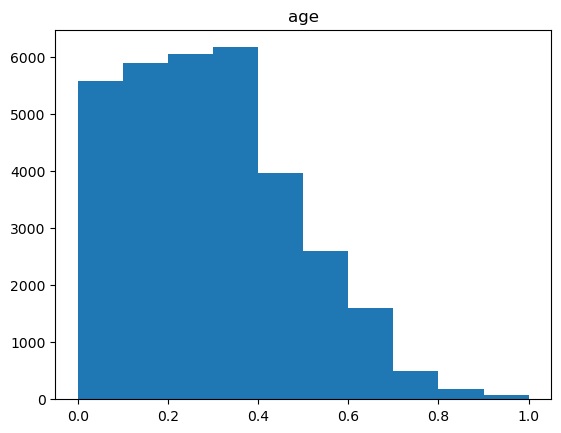

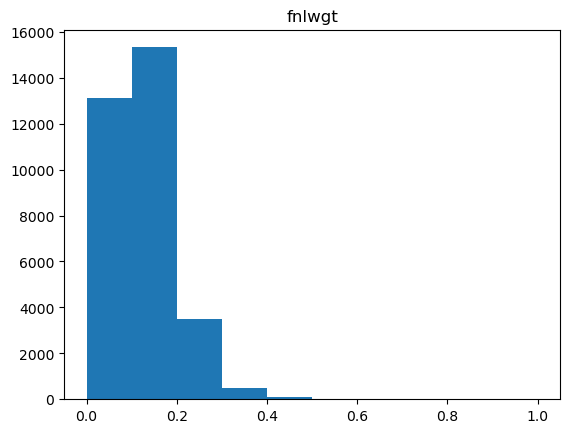

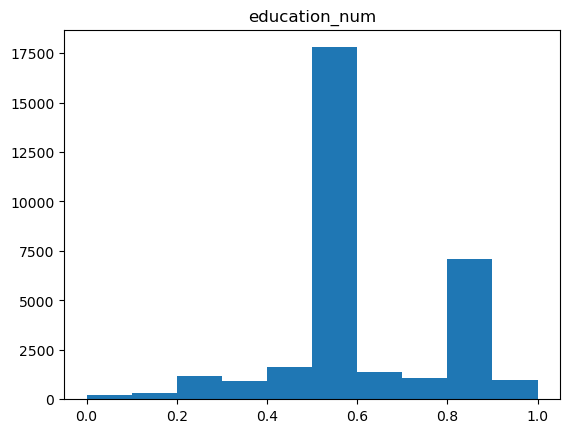

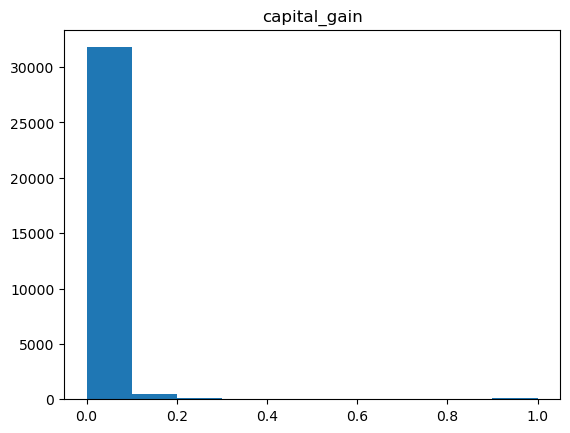

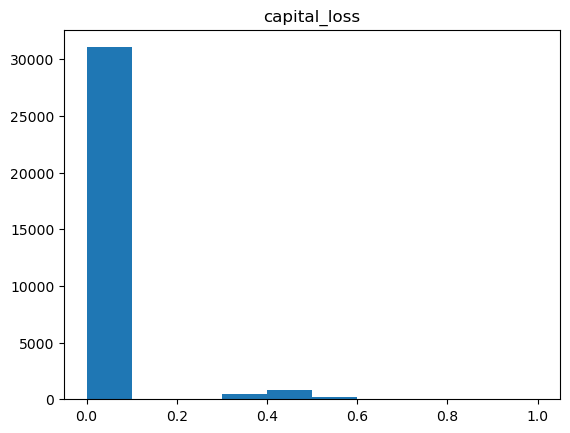

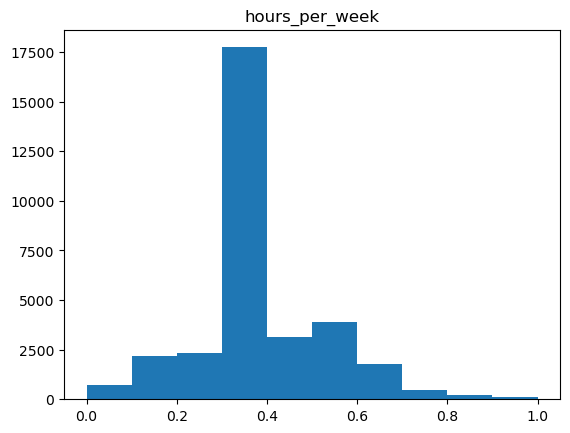

In [247]:
# Creating new features based o the old features.
# let's visualize the numerical features to know the skewness.
columns = ["age","fnlwgt","education_num","capital_gain","capital_loss","hours_per_week"]
for col in columns:
    plt.hist(data[col])
    plt.title(col)
    plt.show()

In [248]:
# From the above graphs we can conclude that age feature has high skewness so transform the data using log function.

def log_transform(x):
    return np.log(x)

In [249]:
transformed_age = log_transform(data.age)
transformed_age

0       -1.199417
1       -0.793952
2       -1.245937
3       -0.706941
4       -1.892564
           ...   
32556   -1.987874
32557   -1.154965
32558   -0.576887
32559   -2.681022
32560   -0.735111
Name: age, Length: 32561, dtype: float64

<Axes: xlabel='age', ylabel='Count'>

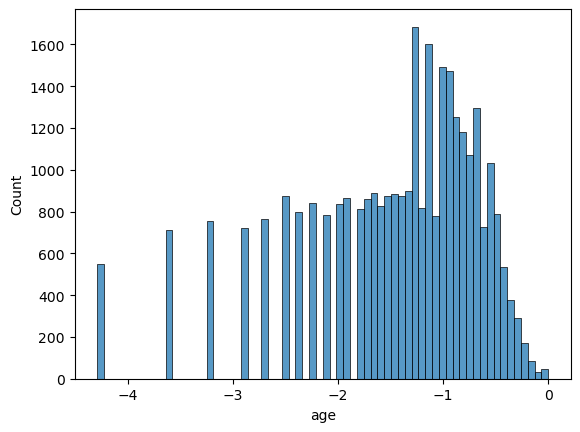

In [250]:
sns.histplot(transformed_age)
# slightly skewness is reduced.

In [251]:
data["log_age"] =np.log(data.age)

In [252]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  32561 non-null  float64
 1   workclass            32561 non-null  int32  
 2   fnlwgt               32561 non-null  float64
 3   education            32561 non-null  int32  
 4   education_num        32561 non-null  float64
 5   marital_status       32561 non-null  int32  
 6   occupation           32561 non-null  int32  
 7   relationship         32561 non-null  int32  
 8   capital_gain         32561 non-null  float64
 9   capital_loss         32561 non-null  float64
 10  hours_per_week       32561 non-null  float64
 11  native_country       32561 non-null  int32  
 12   Amer-Indian-Eskimo  32561 non-null  uint8  
 13   Asian-Pac-Islander  32561 non-null  uint8  
 14   Black               32561 non-null  uint8  
 15   Other               32561 non-null 

In [253]:
#  apply log function to the capital_gain and capital_loss
data['log_gain']=np.log(data.capital_gain)
data['log_loss'] = np.log(data.capital_loss)


In [254]:
# hence when applying the log its giving infinite values so drop those columns.
data.drop(["log_gain","log_loss"],axis=1,inplace=True)

In [255]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  32561 non-null  float64
 1   workclass            32561 non-null  int32  
 2   fnlwgt               32561 non-null  float64
 3   education            32561 non-null  int32  
 4   education_num        32561 non-null  float64
 5   marital_status       32561 non-null  int32  
 6   occupation           32561 non-null  int32  
 7   relationship         32561 non-null  int32  
 8   capital_gain         32561 non-null  float64
 9   capital_loss         32561 non-null  float64
 10  hours_per_week       32561 non-null  float64
 11  native_country       32561 non-null  int32  
 12   Amer-Indian-Eskimo  32561 non-null  uint8  
 13   Asian-Pac-Islander  32561 non-null  uint8  
 14   Black               32561 non-null  uint8  
 15   Other               32561 non-null 

## Task 4 : Feature Selection

In [256]:
# Using Isolation Forest algorithm to identify the outliers.

# import the isolation forest library
from sklearn.ensemble import IsolationForest
clf = IsolationForest(random_state = 10 , contamination = 0.01)
clf.fit(data[["age","education","education_num","capital_gain","capital_loss"]])

IsolationForest(contamination=0.01, random_state=10)

In [257]:
y_pred_outliers = clf.predict(data[["age","education","education_num","capital_gain","capital_loss"]])

In [258]:
df= data[["age","education","education_num","capital_gain","capital_loss"]]

In [259]:
df

,age,education,education_num,capital_gain,capital_loss
0,0.301370,9,0.800000,0.021740,0.0
1,0.452055,9,0.800000,0.000000,0.0
2,0.287671,11,0.533333,0.000000,0.0
3,0.493151,1,0.400000,0.000000,0.0
4,0.150685,9,0.800000,0.000000,0.0
...,...,...,...,...,...
32556,0.136986,7,0.733333,0.000000,0.0
32557,0.315068,11,0.533333,0.000000,0.0
32558,0.561644,11,0.533333,0.000000,0.0
32559,0.068493,11,0.533333,0.000000,0.0


In [260]:
outliers.index

Int64Index([  106,   148,   222,   381,   404,   534,   588,   704,   729,
              937,
            ...
            31828, 31972, 32090, 32138, 32198, 32230, 32238, 32367, 32370,
            32518],
           dtype='int64', length=326)

In [261]:
df["anomely"] = clf.predict(df)

In [262]:
len(df[df["anomely"] == -1])

326

In [263]:
# it has almost 326 outliers , we have to treat the outliers, either delete then or replace them with appropriate values.
# lets remove those outliers from the data
outliers = df[df["anomely"]== -1 ]

In [ ]:
# removing the outliers.
for i in outliers.index:
    data.drop(i,axis=0,inplace=True)

In [273]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32235 entries, 0 to 32560
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  32235 non-null  float64
 1   workclass            32235 non-null  int32  
 2   fnlwgt               32235 non-null  float64
 3   education            32235 non-null  int32  
 4   education_num        32235 non-null  float64
 5   marital_status       32235 non-null  int32  
 6   occupation           32235 non-null  int32  
 7   relationship         32235 non-null  int32  
 8   capital_gain         32235 non-null  float64
 9   capital_loss         32235 non-null  float64
 10  hours_per_week       32235 non-null  float64
 11  native_country       32235 non-null  int32  
 12   Amer-Indian-Eskimo  32235 non-null  uint8  
 13   Asian-Pac-Islander  32235 non-null  uint8  
 14   Black               32235 non-null  uint8  
 15   Other               32235 non-null 

In [274]:
# PPS ( Predictive Power Score ) to find the relationships between features.

In [279]:
!pip install ppscore

In [280]:
import ppscore as pps

In [283]:
relation_ships = pps.matrix(data)

In [300]:
filtered_data = relation_ships[(relation_ships['ppscore'] > 0.3) & (relation_ships['ppscore'] != 1)]

In [301]:
filtered_data

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
70,education,education_num,1.000000,regression,True,mean absolute error,0.1234,4.780570e-15,DecisionTreeRegressor()
159,relationship,marital_status,0.315296,regression,True,mean absolute error,1.1814,8.089095e-01,DecisionTreeRegressor()
324,Black,White,0.381910,regression,True,mean absolute error,0.1488,9.197175e-02,DecisionTreeRegressor()
366,White,Black,0.345206,regression,True,mean absolute error,0.1002,6.561034e-02,DecisionTreeRegressor()


In [311]:
filtered_data = relation_ships[(relation_ships['ppscore'] < -0.1) & (relation_ships['ppscore'] != 1)]


In [312]:
filtered_data

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model


 Hence there is no much relation ship between the features, almost only three pairs has 0.3 ~= 0.4 score .

 relationship - maritial_status : 0.32 

 black - White : 0.38

 white - black : 0.35